In [130]:
#pip install modules

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy
import warnings
warnings.filterwarnings('ignore')
import modules
from scipy import stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from statsmodels.distributions.empirical_distribution import ECDF



In [132]:
Path_to_data = "../data/store.csv"
#Read data from csv file
store = pd.read_csv(Path_to_data, na_values=['?', None], low_memory = False)
#, parse_dates=['date']
#Display sample of the data
store.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
795,796,a,c,7180.0,11.0,2012.0,0,NaN,NaN,NaN
956,957,d,c,1420.0,11.0,2012.0,0,NaN,NaN,NaN
506,507,a,c,9070.0,4.0,2011.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
556,557,a,a,250.0,NaN,NaN,0,NaN,NaN,NaN
26,27,a,a,60.0,1.0,2005.0,1,5.0,2011.0,"Jan,Apr,Jul,Oct"
331,332,a,a,1840.0,3.0,2006.0,0,NaN,NaN,NaN
1017,1018,c,c,140.0,9.0,2012.0,0,NaN,NaN,NaN
994,995,d,a,6560.0,12.0,2013.0,0,NaN,NaN,NaN
468,469,c,c,710.0,9.0,2005.0,0,NaN,NaN,NaN
376,377,a,c,100.0,6.0,2010.0,1,18.0,2010.0,"Feb,May,Aug,Nov"


In [133]:
# column names
store.columns.tolist()

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [134]:
# number of data points
print(f" There are {store.shape[0]} rows and {store.shape[1]} columns")

 There are 1115 rows and 10 columns


In [135]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The store dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(store)

The store dataset contains 21.01 % missing values.


In [136]:
# Now which column(s) has missing values
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

# **FINDING AND DEALING WITH OUTLIERS**

<AxesSubplot:xlabel='CompetitionDistance'>

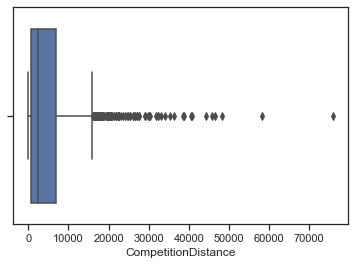

In [137]:
sns.boxplot(x=store['CompetitionDistance'])

<AxesSubplot:xlabel='CompetitionOpenSinceMonth'>

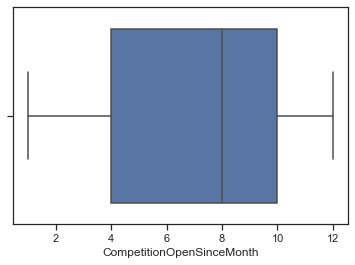

In [138]:
sns.boxplot(x=store['CompetitionOpenSinceMonth'])

<AxesSubplot:xlabel='CompetitionOpenSinceYear'>

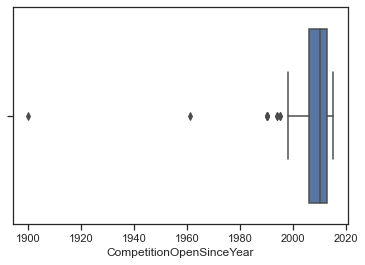

In [139]:
sns.boxplot(x=store['CompetitionOpenSinceYear'])

<AxesSubplot:xlabel='Promo2'>

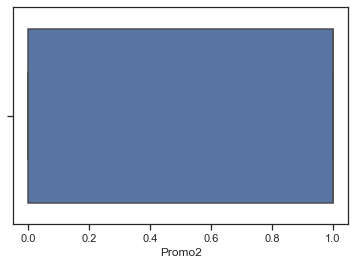

In [140]:
sns.boxplot(x=store['Promo2'])

<AxesSubplot:xlabel='Promo2SinceWeek'>

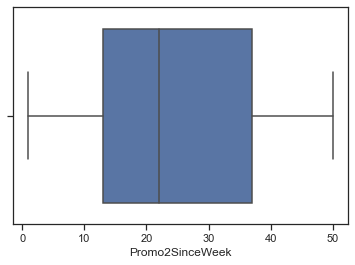

In [141]:
sns.boxplot(x=store['Promo2SinceWeek'])

<AxesSubplot:xlabel='Promo2SinceYear'>

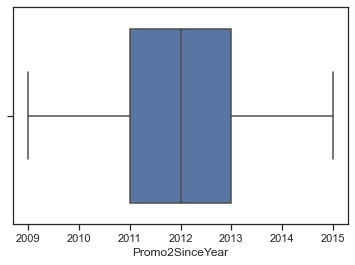

In [142]:
sns.boxplot(x=store['Promo2SinceYear'])

In [143]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [144]:
z = np.abs(stats.zscore(store[['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2','Promo2SinceWeek', 'Promo2SinceYear']]))
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


In [145]:
Q1 = store.quantile(0.25)
Q3 = store.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Store                         557.0
CompetitionDistance          6165.0
CompetitionOpenSinceMonth       6.0
CompetitionOpenSinceYear        7.0
Promo2                          1.0
Promo2SinceWeek                24.0
Promo2SinceYear                 2.0
dtype: float64


In [146]:
print(store < (Q1 - 1.5 * IQR)) |(store > (Q3 + 1.5 * IQR))

      Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0          False                False                      False   
1          False                False                      False   
2          False                False                      False   
3          False                False                      False   
4          False                False                      False   
...          ...                  ...                        ...   
1110       False                False                      False   
1111       False                False                      False   
1112       False                False                      False   
1113       False                False                      False   
1114       False                False                      False   

      CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                        False   False            False            False   
1                        False 

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [147]:
store_out = store[~((store < (Q1 - 1.5 * IQR)) |(store > (Q3 + 1.5 * IQR))).any(axis=1)]
print(store.shape)
print(store_out.shape)


(1115, 10)
(996, 10)


In [148]:
store_out.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    320
CompetitionOpenSinceYear     320
Promo2                         0
Promo2SinceWeek              467
Promo2SinceYear              467
PromoInterval                467
dtype: int64

In [149]:
store_out.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,996.000000,993.000000,676.000000,676.000000,996.000000,529.000000,529.000000
mean,557.904618,3410.292044,7.250000,2009.100592,0.531124,23.618147,2011.790170
std,322.254031,3767.334213,3.235623,4.037447,0.499281,14.270179,1.658146
min,1.000000,20.000000,1.000000,1998.000000,0.000000,1.000000,2009.000000
25%,281.750000,600.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,555.500000,1990.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,837.250000,4700.000000,10.000000,2012.000000,1.000000,37.000000,2013.000000
max,1115.000000,15770.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# **FILLING MISSING VALUES**

Since most of the data in the columns is not skewed, we will fill the missing values with mean/median and for the column with skewed data we will fill with the median. For categorical data, we will fill the missing values with the mode.

In [154]:
store_out.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,22.0,2012.0,NaN
5,6,a,a,310.0,12.0,2013.0,0,22.0,2012.0,NaN


In [156]:
# Filling with Mode
store_out['PromoInterval'] = store_out['PromoInterval'].fillna(store_out['PromoInterval'].mode()[0])

# Filling with Mean and Median
store_out['CompetitionDistance'].fillna(store_out['CompetitionDistance'].median(), inplace = True)
store_out['CompetitionOpenSinceMonth'].fillna(store_out['CompetitionOpenSinceMonth'].median(), inplace = True)
store_out['CompetitionOpenSinceYear'].fillna(store_out['CompetitionOpenSinceYear'].median(), inplace = True)
store_out['Promo2SinceWeek'].fillna(store_out['Promo2SinceWeek'].median(), inplace = True)
store_out['Promo2SinceYear'].fillna(store_out['Promo2SinceYear'].median(), inplace = True)
    
store_out.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [165]:
train = pd.read_csv("../data/train.csv", parse_dates = True, low_memory = False, index_col = 'Date')
# time series as indexes
train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

# **EDA**

In [158]:
print("In total: ", train.shape)
train.head(5)

In total:  (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


# FEATURE ENGINEERING

In [166]:
# data extraction
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

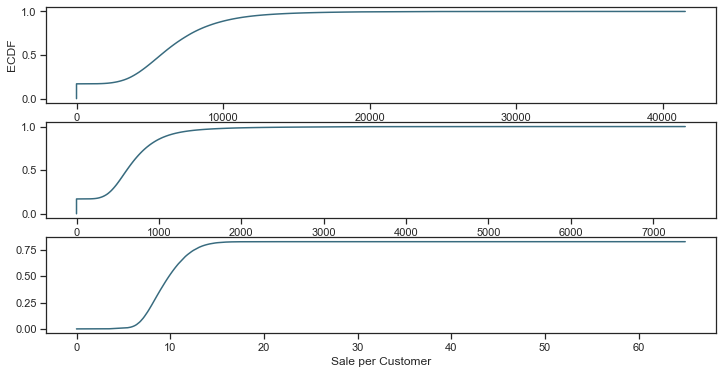

In [167]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales'); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers');

# plot second ECDF  
plt.subplot(313)
cdf = ECDF(train['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sale per Customer');

In [168]:
# closed stores
train[(train.Open == 0) & (train.Sales == 0)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,292,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-31,876,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-30,292,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-30,876,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-29,292,3,0,0,0,1,0,1,2015,7,29,31,NaN


In [170]:
# opened stores with zero sales
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 13)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-05-15,971,5,0,0,1,0,0,1,2015,5,15,20,NaN
2015-03-26,674,4,0,0,1,0,0,0,2015,3,26,13,NaN
2015-02-05,699,4,0,0,1,1,0,0,2015,2,5,6,NaN
2014-10-01,708,3,0,0,1,1,0,0,2014,10,1,40,NaN
2014-09-22,357,1,0,0,1,0,0,0,2014,9,22,39,NaN


In [171]:
print("Closed stores and days which didn't have any sales won't be counted into the forecasts.")
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

print("In total: ", train.shape)

Closed stores and days which didn't have any sales won't be counted into the forecasts.
In total:  (844338, 13)


In [172]:
print("Joining train set with an additional store information.")

# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

#train_store.to_csv("../data/combined.csv")

print("In total: ", train_store.shape)
train_store.head()

Joining train set with an additional store information.
In total:  (844338, 22)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [173]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


In [174]:
train_store.groupby('StoreType')['Customers', 'Sales'].sum()

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


In [188]:
train_store.columns.tolist()

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'SalePerCustomer',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

# TIME SERIES ANALYSIS

<AxesSubplot:xlabel='Date'>

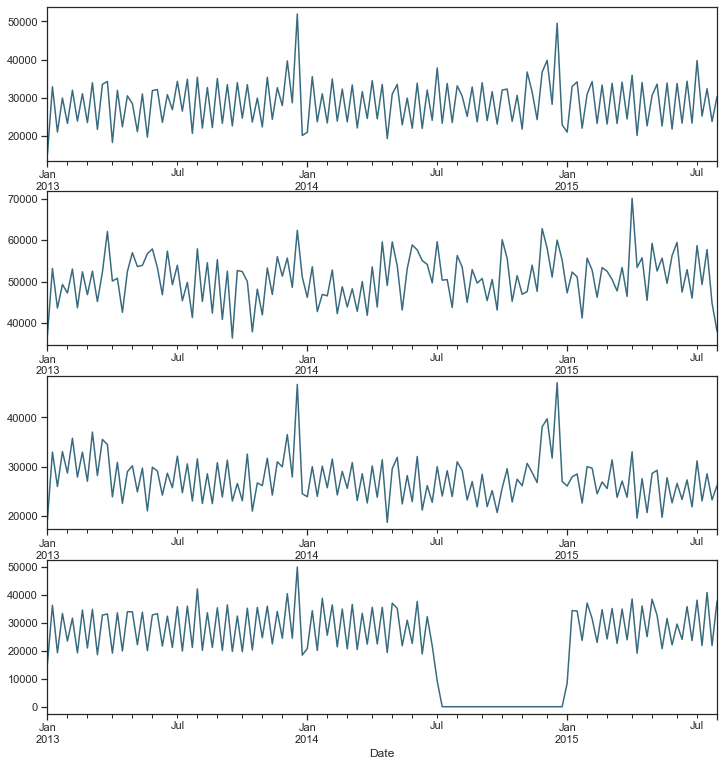

In [185]:
# preparation: input should be float type
train['Sales'] = train['Sales'] * 1.0

# store types
sales_a = train[train.Store == 2]['Sales']
sales_b = train[train.Store == 85]['Sales'].sort_index(ascending = True) # solve the reverse order
sales_c = train[train.Store == 1]['Sales']
sales_d = train[train.Store == 13]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# store types
sales_a.resample('W').sum().plot(color = c, ax = ax1)
sales_b.resample('W').sum().plot(color = c, ax = ax2)
sales_c.resample('W').sum().plot(color = c, ax = ax3)
sales_d.resample('W').sum().plot(color = c, ax = ax4)

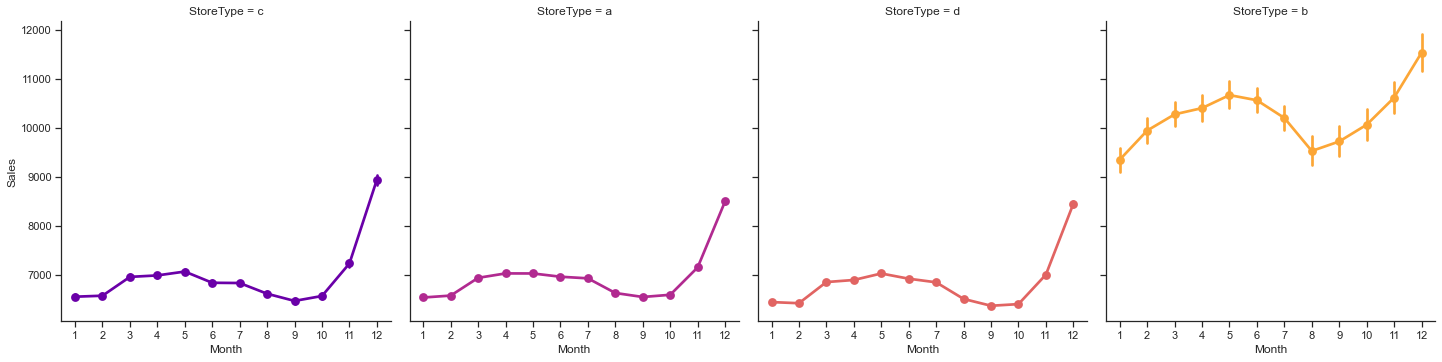

In [186]:
# sales trends
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType', 
               color = c) 

In [187]:
# sales trends
sns.factorplot(data = train_store, x = 'WeekOfYear', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType', 
               color = c) 

ValueError: Could not interpret input 'Week'

# CHECKING CORRELATION

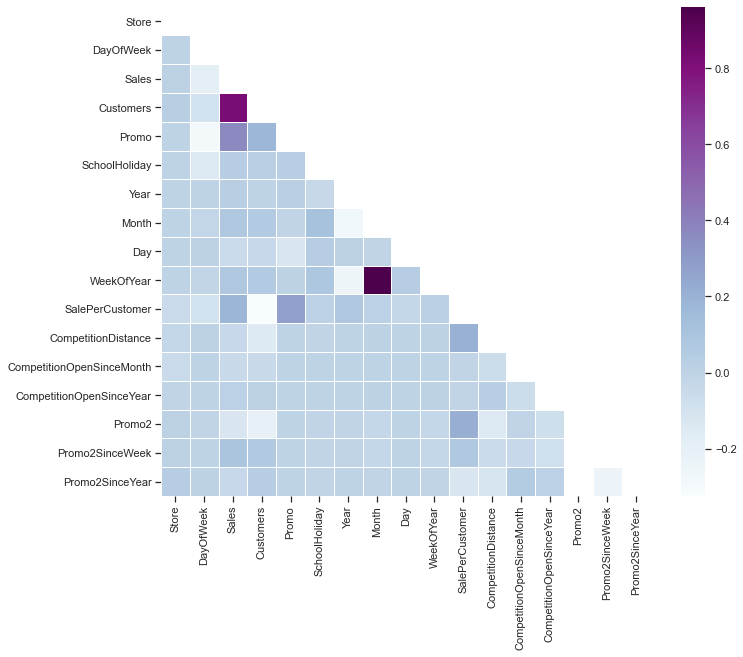

In [181]:
# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = train_store.drop('Open', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

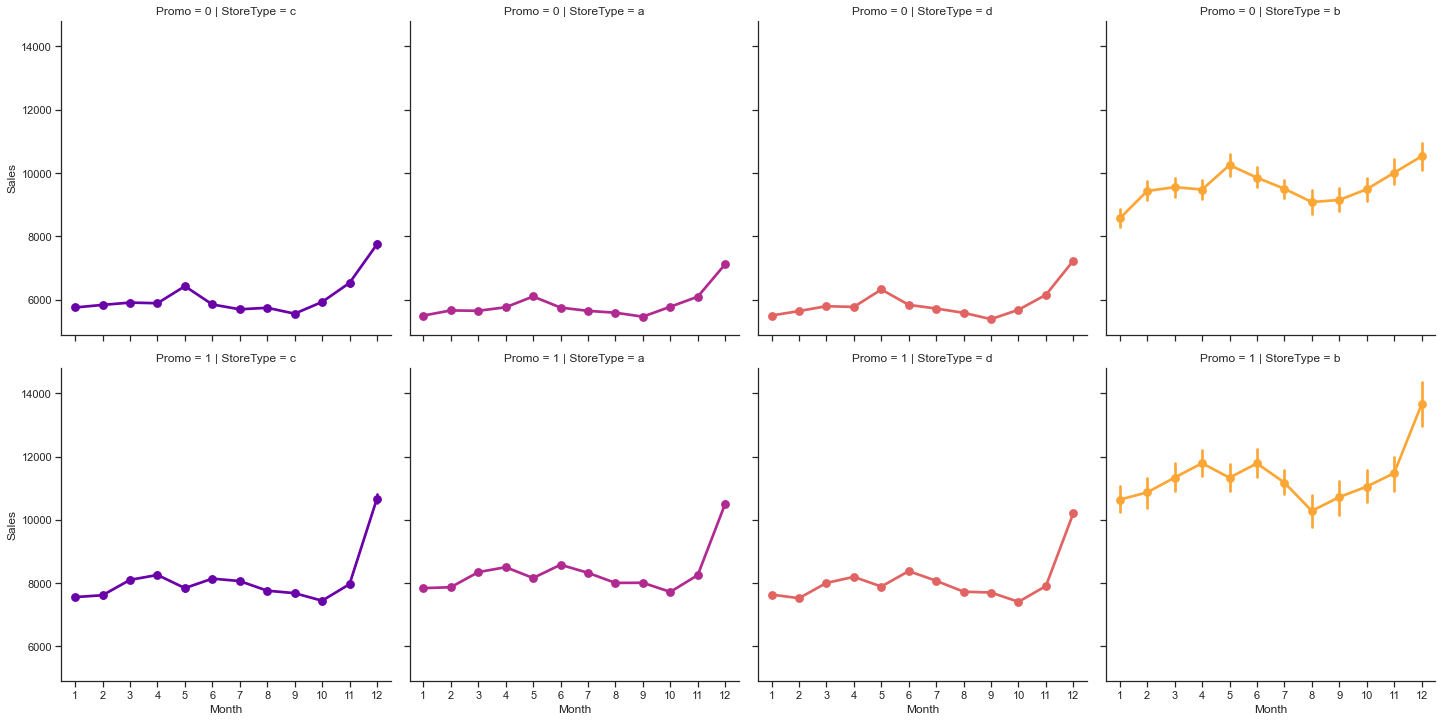

In [175]:
# sales trends
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

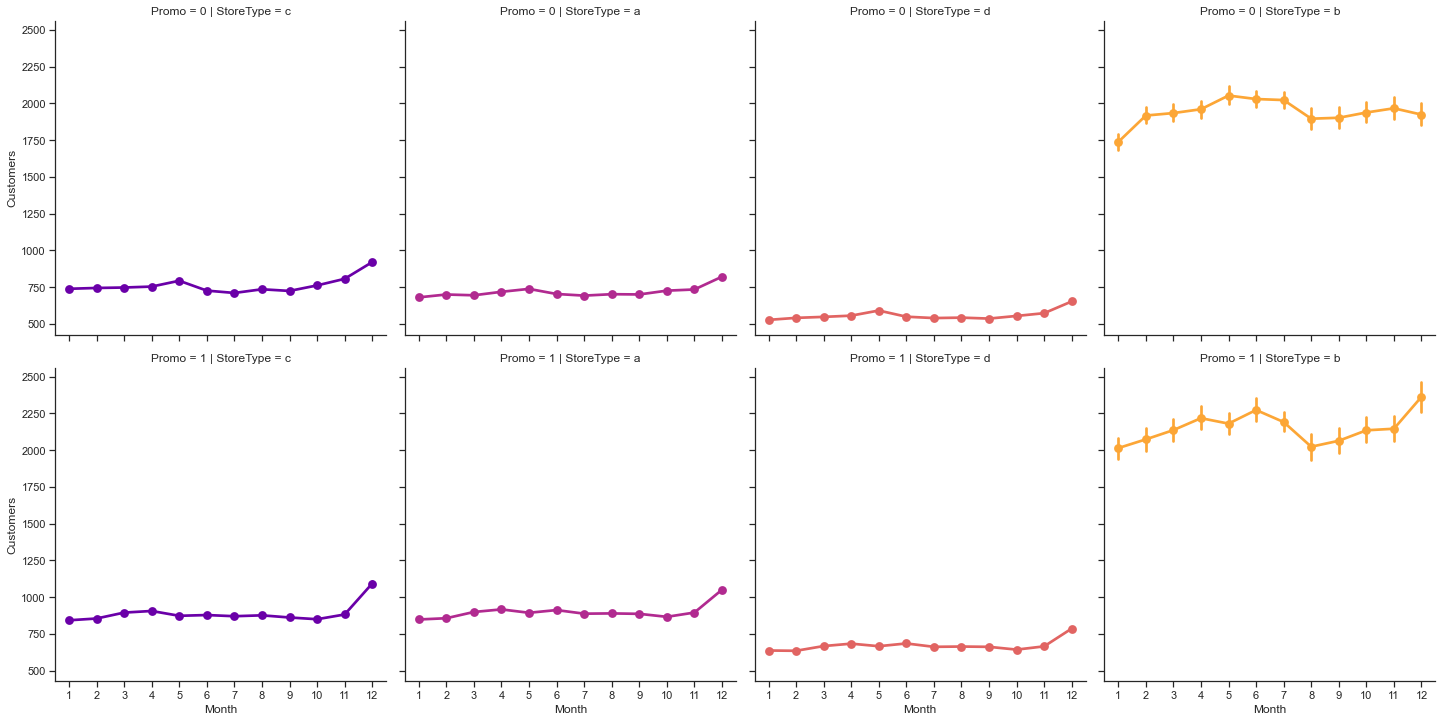

In [176]:
# sales trends
sns.factorplot(data = train_store, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

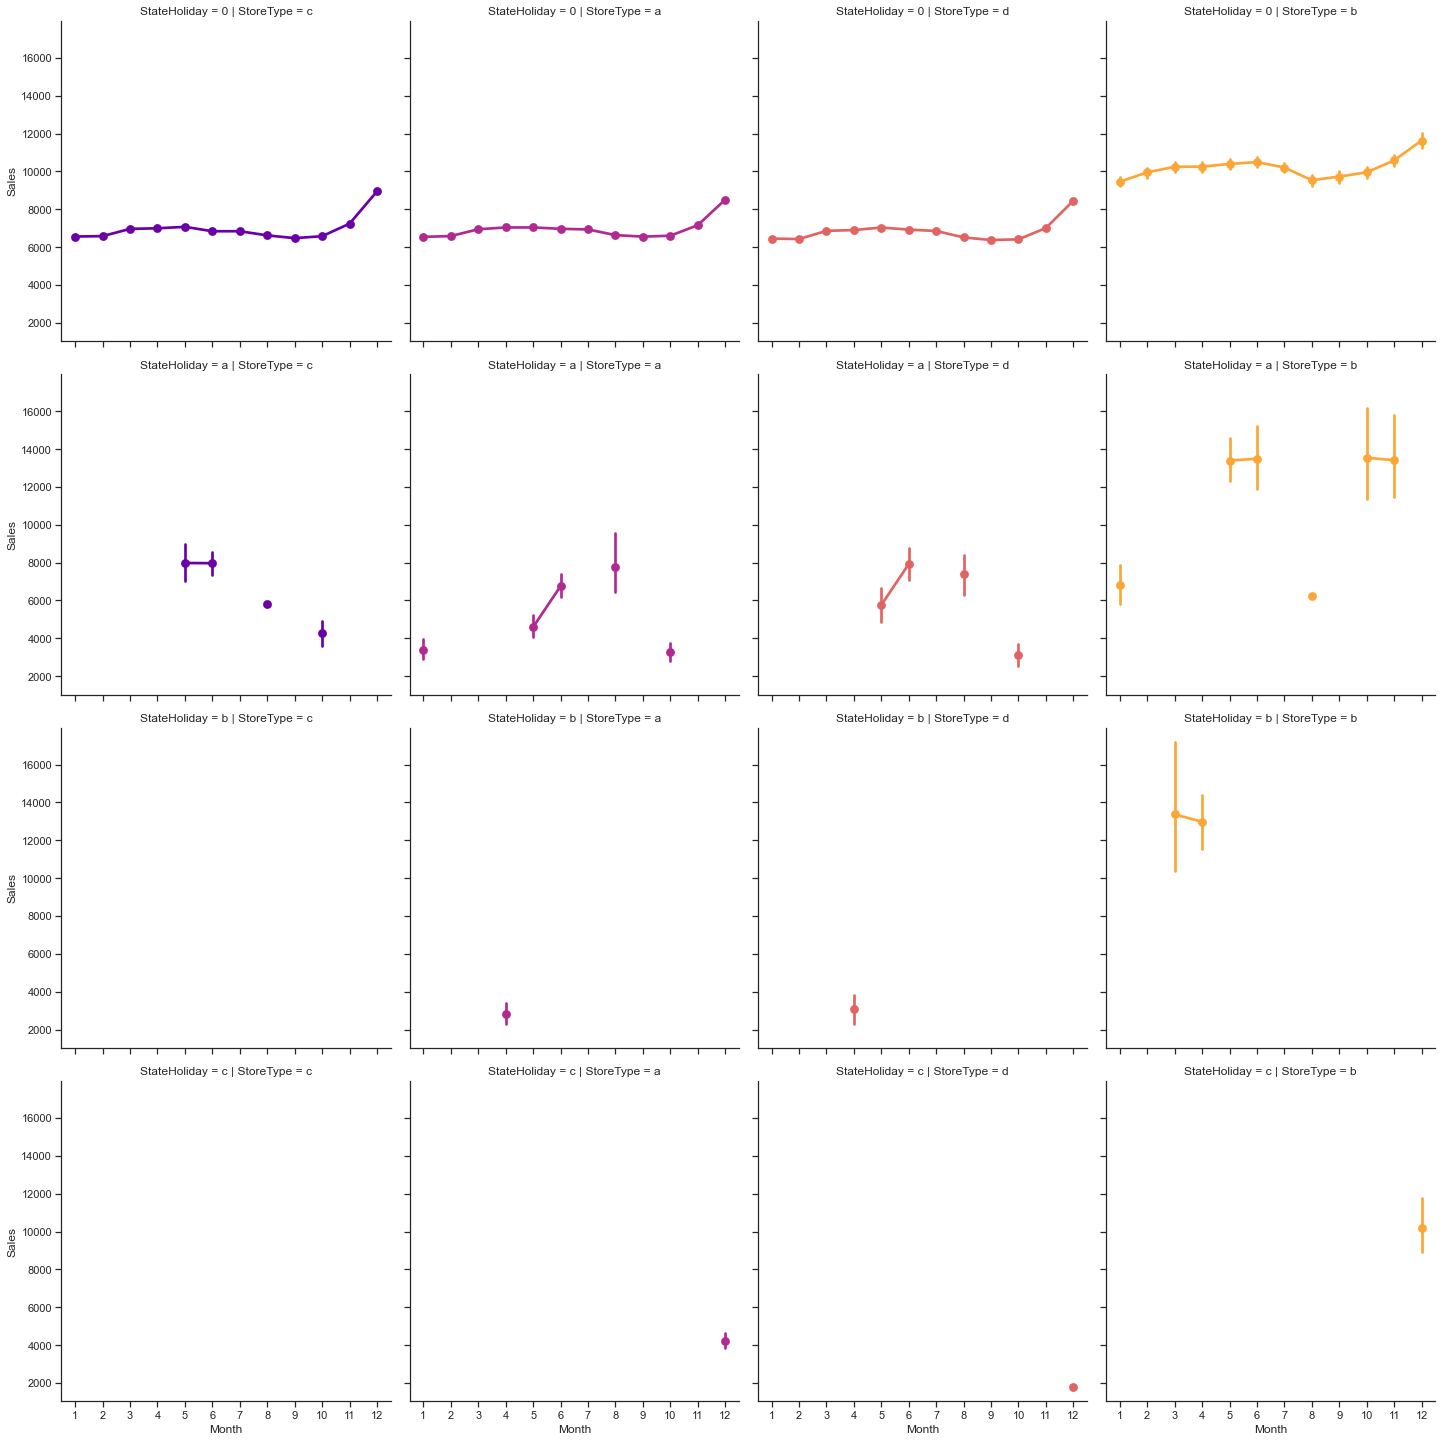

In [178]:
# sales trends
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StateHoliday', # per state holiday in the store in rows
               color = c) 

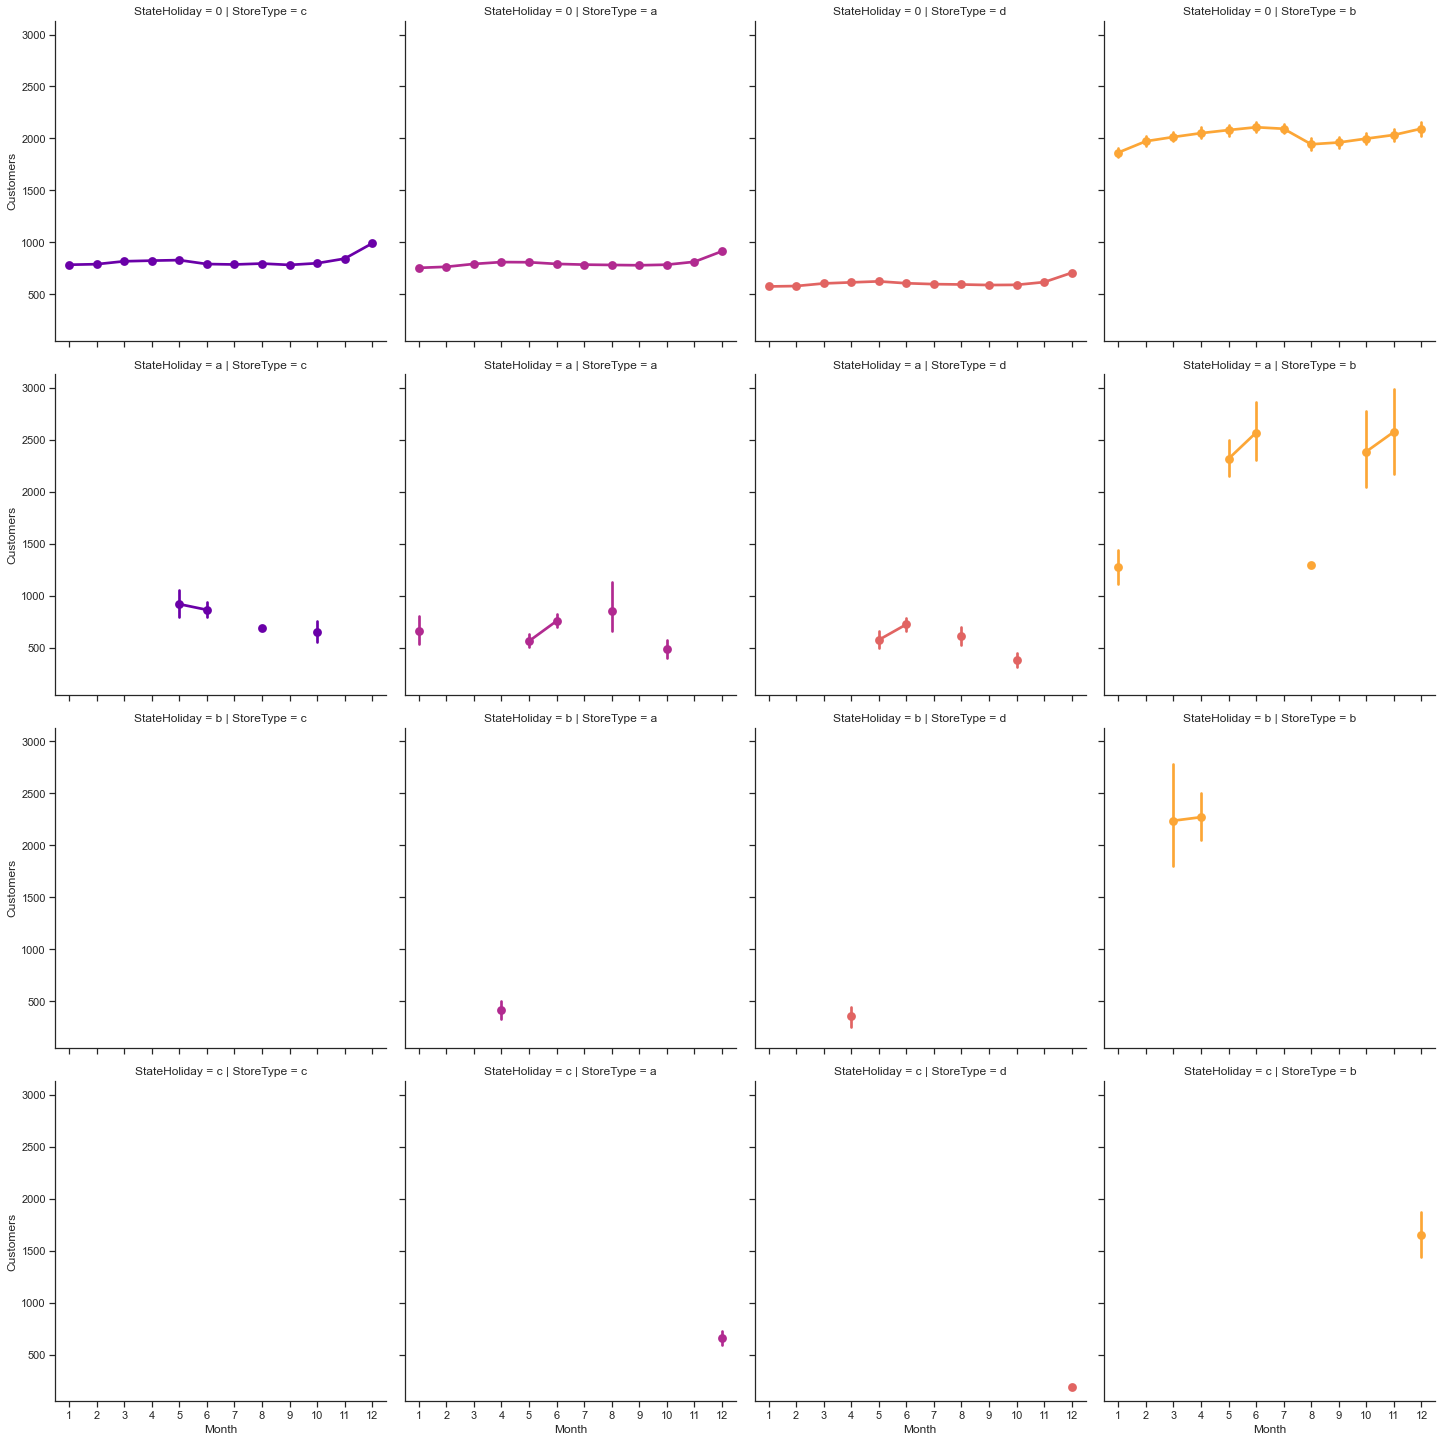

In [179]:
# sales trends
sns.factorplot(data = train_store, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StateHoliday', # per promo in the store in rows
               color = c) 

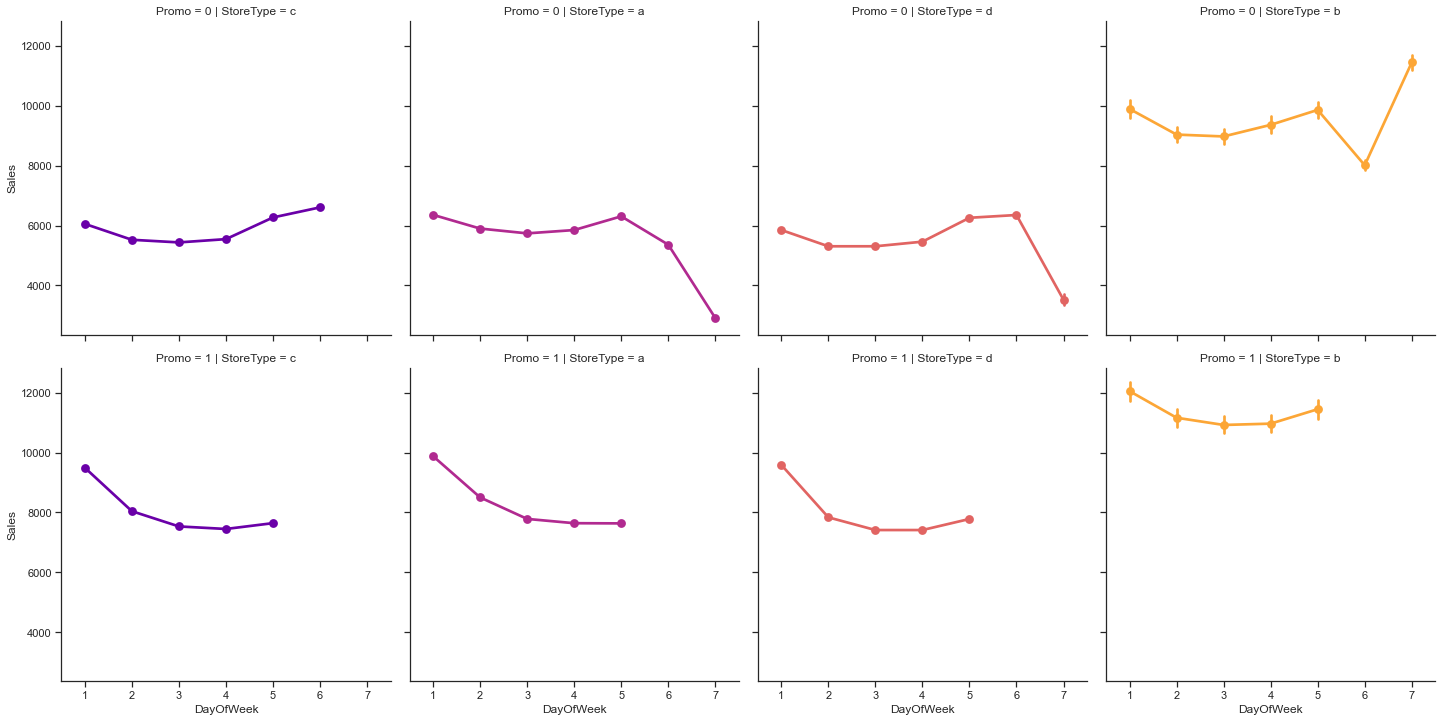

In [182]:
# sale per customer trends
sns.factorplot(data = train_store, x = 'DayOfWeek', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

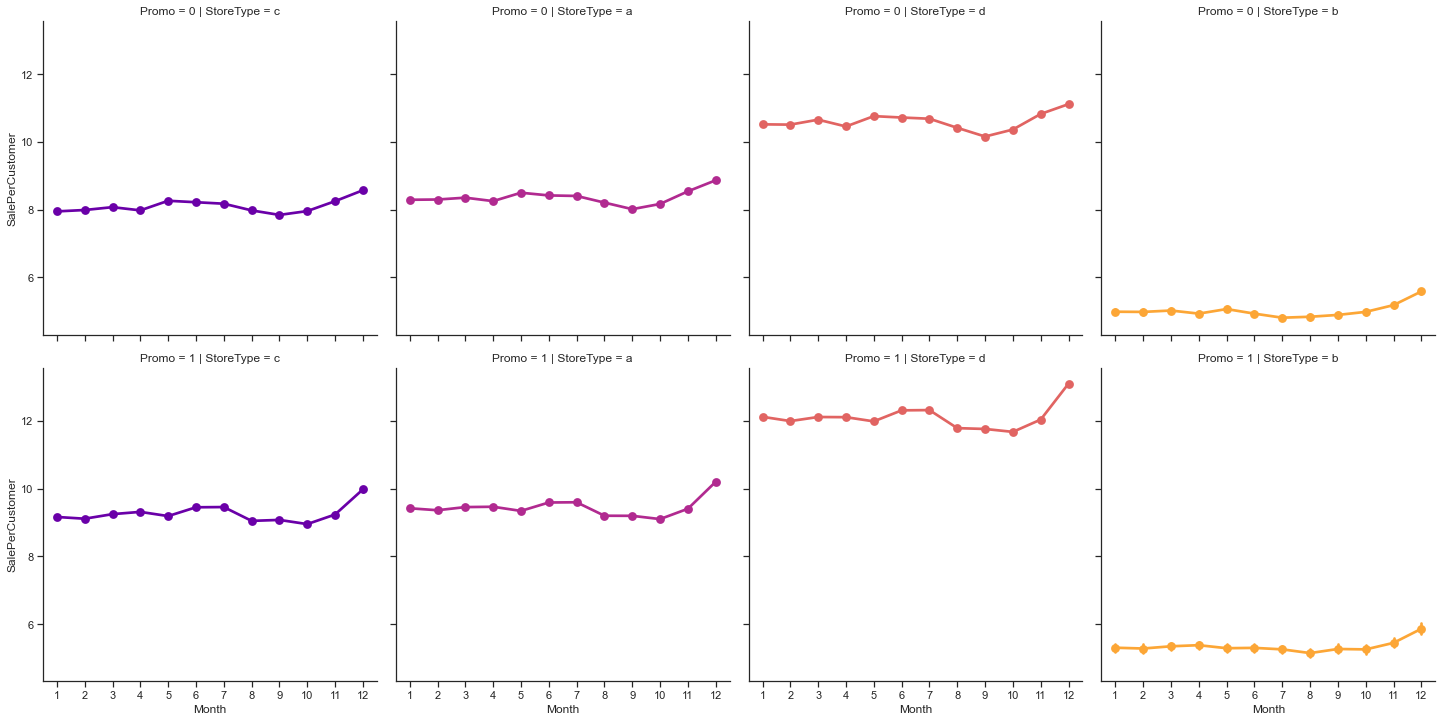

In [180]:
# sale per customer trends
sns.factorplot(data = train_store, x = 'Month', y = "SalePerCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 